# Contextualização do problema

A análise dos dados de banda larga é fundamental para entendermos como essa tecnologia está sendo utilizada em determinada região e quais são as suas implicações socioeconômicas. No caso do estado de Sergipe, a análise desses dados se torna ainda mais relevante, já que essa é uma região que vem passando por importantes transformações no que diz respeito à infraestrutura de telecomunicações.

A partir dos dados disponíveis em arquivos CSV, podemos realizar uma série de análises, tais como a identificação de áreas com maior ou menor disponibilidade de banda larga, a verificação da velocidade média da internet, a identificação de problemas de conectividade, entre outras. Essas informações são extremamente importantes para os gestores públicos, empresas de telecomunicações e também para os cidadãos, que podem utilizar esses dados para tomar decisões mais informadas a respeito do uso da internet.

Além disso, a análise dos dados de banda larga também é fundamental para o desenvolvimento de políticas públicas mais eficientes na área de telecomunicações. Com base nessas informações, é possível identificar quais são as regiões mais carentes de investimentos em infraestrutura de telecomunicações e, a partir disso, direcionar recursos para essas áreas. Também é possível monitorar a qualidade dos serviços prestados pelas empresas de telecomunicações e, se necessário, aplicar sanções para garantir que os usuários tenham acesso a uma internet de qualidade.

Em resumo, a análise dos dados de banda larga é fundamental para o desenvolvimento econômico e social de uma região, além de ser uma ferramenta poderosa para garantir que os usuários tenham acesso a serviços de qualidade e para o desenvolvimento de políticas públicas mais eficientes na área de telecomunicações. Por isso, a análise desses dados em relação ao estado de Sergipe se torna um tema de grande importância e relevância.

# Datasets



*   https://github.com/joaovpnt/Analise-Banda-Larga/blob/main/Datasets/microdados_se.csv
*   https://github.com/joaovpnt/Analise-Banda-Larga/blob/main/Datasets/municipios_se.csv




# Perguntas para serem respondidas

##1.   Como está distribuído o número de acessos de acordo com os atributos apresentados?
##2.   Quais as características em relação a tecnologia, transmissão e velocidade que predomina no estado hoje em dia?
##3.   Como essas características mudaram ao longo do ano?


In [ ]:
#Importação das bibliotecas

import seaborn as sns # Biblioteca para visualização
import matplotlib.pyplot as plt # Biblioteca de visualização
import pandas as pd # Biblioteca para lidar com a base de dados

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Abertura do arquivo

data = pd.read_csv("microdados_se.csv")
data_estado = data.drop(columns=["id_municipio", "sigla_uf", "cnpj"])
data_estado = data_estado.groupby(by=["ano", "mes", "empresa", "porte_empresa", "tecnologia", "transmissao", "velocidade"], as_index=False).sum()
data_estado

,ano,mes,empresa,porte_empresa,tecnologia,transmissao,velocidade,acessos
0,2007,3,BT,Pequeno Porte,Outra,Outra,512kbps a 2Mbps,1.0
1,2007,3,BT,Pequeno Porte,SAT,Satélite,512kbps a 2Mbps,16.0
2,2007,3,BT,Pequeno Porte,xDSL,Cabo Metálico,512kbps a 2Mbps,7.0
3,2007,3,CENTURYLINK COMUNICACOES DO BRASIL LTDA,Pequeno Porte,SAT,Satélite,64Kbps a 512Kbps,7.0
4,2007,3,CLARO,Grande Porte,FTTH,Fibra,2Mbps a 34Mbps,1.0
...,...,...,...,...,...,...,...,...
29481,2022,2,WANHOUSE SOLUÇÕES EM TECNOLOGIA LTDA - EPP,Pequeno Porte,ETHERNET,Cabo Metálico,2Mbps a 12Mbps,323.0
29482,2022,2,WANHOUSE SOLUÇÕES EM TECNOLOGIA LTDA - EPP,Pequeno Porte,FTTH,Fibra,> 34Mbps,433.0
29483,2022,2,ZENAIDE ALVES DE SOUZA OLIVEIRA E CIA LTDA - ME,Pequeno Porte,ETHERNET,Cabo Metálico,12Mbps a 34Mbps,391.0
29484,2022,2,ZENAIDE ALVES DE SOUZA OLIVEIRA E CIA LTDA - ME,Pequeno Porte,ETHERNET,Rádio,2Mbps a 12Mbps,25.0


In [ ]:
analise_tecnologias_recentes = data_estado.filter(items=['ano', 'mes', 'tecnologia', 'acessos'])
analise_tecnologias_recentes = analise_tecnologias_recentes.query('ano == 2022 and mes == 2')
analise_tecnologias_recentes = analise_tecnologias_recentes.groupby('tecnologia')['acessos'].sum()
analise_tecnologias_recentes = pd.DataFrame({'Tecnologia': analise_tecnologias_recentes.index, 'Total de acessos': analise_tecnologias_recentes.values})
analise_tecnologias_recentes = analise_tecnologias_recentes.sort_values(['Total de acessos'], ascending=False)
analise_tecnologias_recentes

,Tecnologia,Total de acessos
6,FTTH,141764.0
9,HFC,47393.0
4,ETHERNET,31628.0
0,ADSL1,10994.0
1,ADSL2,10660.0
5,FTTB,6986.0
16,Wi-Fi,5417.0
2,Cable Modem,3068.0
10,LTE,2580.0
14,VSAT,1910.0


## Análise das tecnologias

In [ ]:
pd.options.plotting.backend = "plotly"

grafico_tec_recentes = analise_tecnologias_recentes.head(5).plot.bar(x='Tecnologia', y='Total de acessos', title='Numero de acessos por tecnologia em fevereiro de 2022', text_auto=True)
grafico_tec_recentes.update_yaxes(tickformat="000")
grafico_tec_recentes.update_traces(marker_color='#4072cf')
grafico_tec_recentes.show()

In [ ]:
historico_tecnologia = data_estado.query('ano > 2010 and ano < 2022 and mes == 2')
historico_tecnologia = historico_tecnologia.filter(items=['ano', 'tecnologia', 'acessos'])
historico_tecnologia = historico_tecnologia.groupby(['ano', 'tecnologia'])['acessos'].sum()
historico_tecnologia = historico_tecnologia.to_frame().reset_index()
historico_tecnologia

df_historico_tecnologia = pd.DataFrame()
for ano in historico_tecnologia['ano'].sort_values().unique():
   df_historico_tecnologia = pd.concat([historico_tecnologia.query('ano == @ano').nlargest(3, 'acessos'), df_historico_tecnologia])

df_historico_tecnologia = df_historico_tecnologia.sort_values(['ano'])
df_historico_tecnologia.columns = ['Ano', 'Tecnologia', 'Total de acessos']
df_historico_tecnologia = df_historico_tecnologia.sort_values(['Ano', 'Total de acessos'])
df_historico_tecnologia

,Ano,Tecnologia,Total de acessos
2,2011,ETHERNET,3153.0
9,2011,Wi-Fi,3704.0
10,2011,xDSL,50047.0
13,2012,ETHERNET,3773.0
19,2012,Wi-Fi,5388.0
20,2012,xDSL,58574.0
23,2013,ETHERNET,5490.0
29,2013,Wi-Fi,10115.0
30,2013,xDSL,76238.0
39,2014,Wi-Fi,7119.0


In [ ]:
import plotly.express as px

grafico_historico_tecnologia = px.bar(df_historico_tecnologia, x="Ano", y="Total de acessos", color="Tecnologia", barmode='group', title='Comparação histórica de tecnologias por ano em fevereiro')
grafico_historico_tecnologia.update_yaxes(tickformat="000")
grafico_historico_tecnologia.update_layout(xaxis=dict(type="category", categoryorder="category ascending"), bargap=0.30)
grafico_historico_tecnologia.update_traces(width=0.3)       
grafico_historico_tecnologia.show()

## Análise das transmissões

In [ ]:
analise_transmissao_recentes = data_estado.filter(items=['ano', 'mes', 'transmissao', 'acessos'])
analise_transmissao_recentes = analise_transmissao_recentes.query('ano == 2022 and mes == 2')
analise_transmissao_recentes = analise_transmissao_recentes.groupby('transmissao')['acessos'].sum()
analise_transmissao_recentes = pd.DataFrame({'Transmissão': analise_transmissao_recentes.index, 'Total de acessos': analise_transmissao_recentes.values})
analise_transmissao_recentes = analise_transmissao_recentes.sort_values(['Total de acessos'], ascending=False)
analise_transmissao_recentes

,Transmissão,Total de acessos
2,Fibra,150760.0
1,Cabo Metálico,50896.0
0,Cabo Coaxial,50834.0
3,Rádio,8161.0
4,Satélite,2083.0


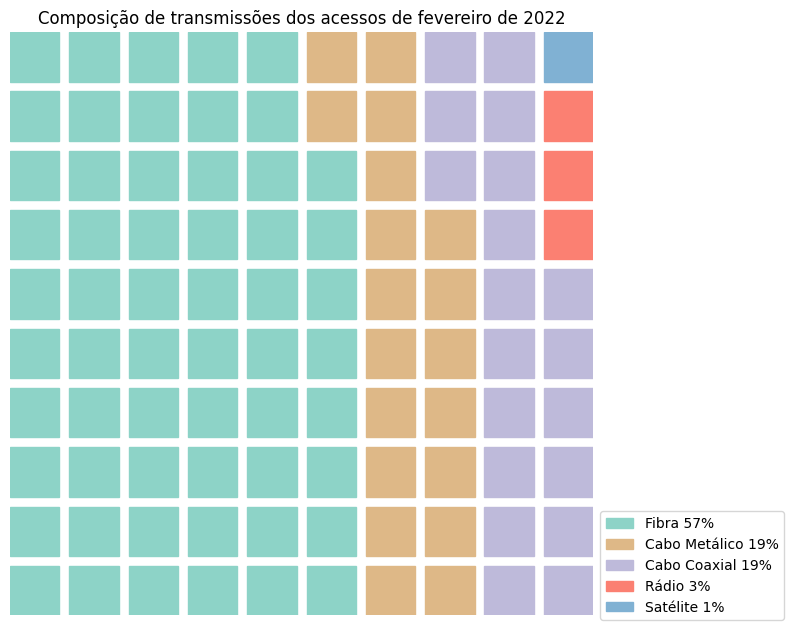

In [ ]:
valor_esp =  list(analise_transmissao_recentes['Total de acessos'])
valor_total = sum(list(analise_transmissao_recentes['Total de acessos']))
porcentagem = []

for valor in valor_esp:
    porcentagem.append(int("%.f" % ((valor/valor_total)*100)))

porcentagem
labels = [] 

for l in range(len(list(analise_transmissao_recentes['Transmissão']))):
    labels.append(f'{list(analise_transmissao_recentes["Transmissão"])[l]} {porcentagem[l]}%')


import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

colours = ['#8dd3c7', '#deb887', '#bebada', '#fb8072', 
           '#80b1d3']

plt.figure(FigureClass=Waffle, figsize=(8,8), rows=10, columns = 10, 
                 values=porcentagem,
                 colors=colours,
                 labels=labels, 
                 legend={'loc':'lower left', 'bbox_to_anchor': (1.0, -0.02), 'ncol':1, 'fontsize':10},
                 title={'label':'Composição de transmissões dos acessos de fevereiro de 2022', 'fontsize':12})

plt.show()

In [ ]:
historico_transmissao = data_estado.query('ano > 2010 and ano < 2022 and mes == 2')
historico_transmissao = historico_transmissao.filter(items=['ano', 'transmissao', 'acessos'])
historico_transmissao = historico_transmissao.groupby(['ano', 'transmissao'])['acessos'].sum()
historico_transmissao = historico_transmissao.to_frame().reset_index()
historico_transmissao

df_historico_transmissao = pd.DataFrame()
for ano in historico_transmissao['ano'].sort_values().unique():
   df_historico_transmissao = pd.concat([historico_transmissao.query('ano == @ano').nlargest(3, 'acessos'), df_historico_transmissao])

df_historico_transmissao = df_historico_transmissao.sort_values(['ano'])
df_historico_transmissao.columns = ['Ano', 'Transmissão', 'Total de acessos']
df_historico_transmissao = df_historico_transmissao.sort_values(['Ano', 'Total de acessos'])
df_historico_transmissao

porcentagens_historico = []

for linha in range(len(df_historico_transmissao.reset_index())):
   ano_corrente = df_historico_transmissao.reset_index()["Ano"][linha]
   df_tmp = historico_transmissao.query('ano == @ano_corrente')
   porcentagens_historico.append(int(round((df_historico_transmissao.reset_index()["Total de acessos"][linha]/df_tmp['acessos'].sum())*100, 0)))

df_historico_transmissao['Porcentagem'] = porcentagens_historico
df_historico_transmissao

,Ano,Transmissão,Total de acessos,Porcentagem
0,2011,Cabo Coaxial,764.0,1
3,2011,Rádio,3970.0,7
1,2011,Cabo Metálico,53866.0,91
5,2012,Cabo Coaxial,3511.0,5
8,2012,Rádio,5663.0,8
6,2012,Cabo Metálico,62936.0,87
10,2013,Cabo Coaxial,3327.0,3
13,2013,Rádio,10615.0,11
11,2013,Cabo Metálico,82253.0,85
17,2014,Fibra,5025.0,4


In [ ]:
import plotly.express as px

bars_labels = []

for porct in df_historico_transmissao['Porcentagem']:
    bars_labels.append(f'{porct}%')

grafico_historico_transmissao = px.bar(df_historico_transmissao, x="Ano", y="Porcentagem", color="Transmissão", title='Comparação histórica da composição de transmissões dos acessos de fevereiro', text=bars_labels)
grafico_historico_transmissao.update_yaxes(tickformat="000")
grafico_historico_transmissao.update_layout(xaxis=dict(type="category", categoryorder="category ascending"))     
grafico_historico_transmissao.show()

## Análise das velocidades

In [ ]:
import pandas as pd

analise_velocidade_recentes = data_estado.filter(items=['ano', 'mes', 'velocidade', 'acessos'])
analise_velocidade_recentes = analise_velocidade_recentes.query('ano == 2022 and mes == 2')
analise_velocidade_recentes = analise_velocidade_recentes.groupby('velocidade')['acessos'].sum()
analise_velocidade_recentes = pd.DataFrame({'Velocidade': analise_velocidade_recentes.index, 'Total de acessos': analise_velocidade_recentes.values})
analise_velocidade_recentes = analise_velocidade_recentes.sort_values(['Total de acessos'], ascending=False)
analise_velocidade_recentes

,Velocidade,Total de acessos
4,> 34Mbps,179262.0
1,12Mbps a 34Mbps,48569.0
2,2Mbps a 12Mbps,33863.0
3,512kbps a 2Mbps,752.0
0,0Kbps a 512Kbps,288.0


In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"

grafico_velocidade_recentes = analise_velocidade_recentes.plot.barh(x='Total de acessos', y='Velocidade', title='Velocidades contratadas nos acessos em fevereiro de 2022', text_auto=True)
grafico_velocidade_recentes.update_xaxes(tickformat="000")
grafico_velocidade_recentes.update_traces(marker_color='#c7add8')
grafico_velocidade_recentes.show()

In [ ]:
import pandas as pd

historico_velocidade = data_estado.query('ano > 2010 and ano < 2022 and mes == 2')
historico_velocidade = historico_velocidade.filter(items=['ano', 'velocidade', 'acessos'])
historico_velocidade = historico_velocidade.groupby(['ano', 'velocidade'])['acessos'].sum()
historico_velocidade = historico_velocidade.to_frame().reset_index()
historico_velocidade

df_historico_velocidade = pd.DataFrame()
for ano in historico_velocidade['ano'].sort_values().unique():
   df_historico_velocidade = pd.concat([historico_velocidade.query('ano == @ano').nlargest(3, 'acessos'), df_historico_velocidade])

df_historico_velocidade = df_historico_velocidade.sort_values(['ano'])
df_historico_velocidade.columns = ['Ano', 'Velocidade', 'Total de acessos']
df_historico_velocidade = df_historico_velocidade.sort_values(['Ano', 'Total de acessos'])
df_historico_velocidade

,Ano,Velocidade,Total de acessos
2,2011,2Mbps a 12Mbps,8160.0
0,2011,0Kbps a 512Kbps,13313.0
3,2011,512kbps a 2Mbps,36568.0
7,2012,2Mbps a 12Mbps,11186.0
5,2012,0Kbps a 512Kbps,12035.0
8,2012,512kbps a 2Mbps,48157.0
11,2013,12Mbps a 34Mbps,9127.0
12,2013,2Mbps a 12Mbps,21971.0
13,2013,512kbps a 2Mbps,54484.0
16,2014,12Mbps a 34Mbps,20900.0


In [ ]:
import plotly.express as px

grafico_historico_velocidade = px.bar(df_historico_velocidade, x="Ano", y="Total de acessos", color="Velocidade", barmode='group', title='Comparação histórica de velocidades por ano em fevereiro')
grafico_historico_velocidade.update_yaxes(tickformat="000")
grafico_historico_velocidade.update_layout(xaxis=dict(type="category", categoryorder="category ascending"), bargap=0.30)
grafico_historico_velocidade.update_traces(width=0.3)       
grafico_historico_velocidade.show()



##4.   Quais empresas com maior número de contratos considerando o porte da empresa?
##5.   Como o perfil do tipo de empresa mudou ao longo dos anos nos estados? Houve crescimento ou redução em relação a um tipo de porte específico?



In [ ]:
import pandas as pd

analise_empresa_grande = data_estado.query('ano == 2022 and mes == 2 and porte_empresa == "Grande Porte"')
analise_empresa_grande = analise_empresa_grande.groupby(['empresa', 'porte_empresa'])['acessos'].sum()
analise_empresa_grande = analise_empresa_grande.to_frame().reset_index()
analise_empresa_grande = analise_empresa_grande.sort_values('acessos', ascending=False)
analise_empresa_grande

analise_empresa_pequena = data_estado.query('ano == 2022 and mes == 2 and porte_empresa == "Pequeno Porte"')
analise_empresa_pequena = analise_empresa_pequena.groupby(['empresa', 'porte_empresa'])['acessos'].sum()
analise_empresa_pequena = analise_empresa_pequena.to_frame().reset_index()
analise_empresa_pequena = analise_empresa_pequena.sort_values('acessos', ascending=False)
analise_empresa_pequena = analise_empresa_pequena.head(4)
analise_empresa_pequena

analise_porte_empresas = pd.concat([analise_empresa_grande, analise_empresa_pequena])
analise_porte_empresas

,empresa,porte_empresa,acessos
0,CLARO,Grande Porte,48680.0
2,VIVO,Grande Porte,28788.0
1,SKY/AT&T,Grande Porte,2580.0
57,MOB SERVICOS DE TELECOMUNICACOES LTDA,Pequeno Porte,51462.0
36,G R V TELECOM LTDA,Pequeno Porte,15057.0
12,Brisanet Servicos de Telecomunicacoes S.A.,Pequeno Porte,11665.0
66,Netiz Internet Ltda,Pequeno Porte,10890.0


In [ ]:
import plotly.express as px

grafico_porte_empresas = px.treemap(analise_porte_empresas, path=[px.Constant("Porte da empresa"), 'porte_empresa', 'empresa'], 
                 values='acessos', title='Distribuição de acesssos considerando o porte da empresa', color='porte_empresa', color_discrete_map={'(?)':'lightgrey', 'Grande Porte':'#24389e', 'Pequeno Porte':'#23979b'})

grafico_porte_empresas.update_layout(margin = dict(t=50, l=25, r=25, b=25))
grafico_porte_empresas.data[0].texttemplate = "%{label}<br>%{value}"
grafico_porte_empresas.show()

In [ ]:
import pandas as pd

total_acessos_grande_porte = data_estado.query('ano == 2022 and mes == 2 and porte_empresa == "Grande Porte"')
total_acessos_grande_porte = total_acessos_grande_porte['acessos'].sum()

total_acessos_pequeno_porte = data_estado.query('ano == 2022 and mes == 2 and porte_empresa == "Pequeno Porte"')
total_acessos_pequeno_porte = total_acessos_pequeno_porte['acessos'].sum()

df_percentual_portes = pd.DataFrame({"Porte": data_estado['porte_empresa'].unique(), "Total de acessos": [total_acessos_pequeno_porte, total_acessos_grande_porte]})
df_percentual_portes

,Porte,Total de acessos
0,Pequeno Porte,182686.0
1,Grande Porte,80048.0


In [ ]:
import plotly.express as px

grafico_porcentagem_portes = px.pie(df_percentual_portes, values='Total de acessos', names='Porte', title='% de acessos por porte da empresa',color_discrete_sequence=["#23979b", "#24389e"])
grafico_porcentagem_portes.update_traces(textposition='inside', textinfo='percent+label')
grafico_porcentagem_portes.show()

In [ ]:
historico_acessos_porte = data_estado.query('mes == 2 and ano > 2010 and ano <= 2021')
historico_acessos_porte = historico_acessos_porte.filter(['ano', 'mes', 'porte_empresa', 'acessos'])
historico_acessos_porte = historico_acessos_porte.groupby(['ano', 'mes', 'porte_empresa'])['acessos'].sum()
historico_acessos_porte = historico_acessos_porte.to_frame()
historico_acessos_porte = historico_acessos_porte.reset_index()
historico_acessos_porte.columns= ['Ano', 'Mês', 'Porte empresa', 'Total de acessos']
historico_acessos_porte

,Ano,Mês,Porte empresa,Total de acessos
0,2011,2,Grande Porte,54008.0
1,2011,2,Pequeno Porte,5029.0
2,2012,2,Grande Porte,62703.0
3,2012,2,Pequeno Porte,9855.0
4,2013,2,Grande Porte,67682.0
5,2013,2,Pequeno Porte,29271.0
6,2014,2,Grande Porte,69568.0
7,2014,2,Pequeno Porte,44153.0
8,2015,2,Grande Porte,79822.0
9,2015,2,Pequeno Porte,52178.0


In [ ]:
import plotly.express as px

grafico_historico_acessos_porte = px.line(historico_acessos_porte, x="Ano", y="Total de acessos", color='Porte empresa', title='Comparação histórica do numero de acessos por porte da empresa no mês de fevereiro', markers=True, color_discrete_sequence=["#24389e", "#23979b"])
grafico_historico_acessos_porte.update_yaxes(tickformat="000")
grafico_historico_acessos_porte.update_layout(xaxis=dict(type="category"))
grafico_historico_acessos_porte.show()

##6. Atualmente, usando os dados mais recentes da base, qual o perfil da distribuição de banda larga no estado de Sergipe por município e regiões de acordo com os atributos presente na base?

In [ ]:
dados_geral = pd.read_csv("microdados_se.csv")
info_municipios = pd.read_csv("municipios_se.csv")
data_estado_completo = pd.merge(dados_geral, info_municipios, how = 'outer')

In [ ]:
import pandas as pd

data_municipios = data_estado_completo.query("ano == 2022 and mes == 2")
data_municipios = data_municipios.sort_values(by="id_municipio")
data_municipios

info_municipios = info_municipios.sort_values(by="id_municipio")
info_municipios = info_municipios.reset_index()

for id in range(len(data_municipios['id_municipio'].unique())):
    data_municipios = data_municipios.replace(info_municipios["id_municipio"][id], info_municipios['nome'][id])

regioes = {
    'Grande Aracaju': ['Aracaju', 'Barra dos Coqueiros', 'Nossa Senhora do Socorro', 'São Cristóvão', "Itaporanga d'Ajuda", 'Laranjeiras', 'Riachuelo', 'Maruim', 'Santo Amaro das Brotas'],
    'Leste': ['Capela', 'Japaratuba', 'Siriri', 'Pirambu', 'Rosário do Catete', 'Carmópolis', 'General Maynard', 'Divina Pastora', 'Santa Rosa de Lima'],
    'Baixo São Francisco': ['Canhoba', 'Amparo de São Francisco', 'Telha', 'Propriá', 'Cedro de São João', 'Malhada dos Bois', 'São Francisco', 'Muribeca', 'Santana do São Francisco', 'Neópolis', 'Japoatã', 'Pacatuba', 'Ilha das Flores', 'Brejo Grande'],
    'Médio Sertão': ['Itabi', 'Gracho Cardoso', 'Aquidabã', 'Feira Nova', 'Cumbe', 'Nossa Senhora das Dores'],
    'Agreste Central': ['Carira', 'Nossa Senhora Aparecida', 'São Miguel do Aleixo', 'Ribeirópolis', 'Frei Paulo', 'Pinhão', 'Pedra Mole', 'Macambira', 'São Domingos', 'Campo do Brito', 'Itabaiana', 'Moita Bonita', 'Malhador', 'Areia Branca'],
    'Alto Sertão': ['Canindé de São Francisco', 'Poço Redondo', 'Porto da Folha', 'Gararu', 'Nossa Senhora de Lourdes', 'Nossa Senhora da Glória', 'Monte Alegre de Sergipe'],
    'Centro Sul': ['Simão Dias', 'Poço Verde', 'Tobias Barreto', 'Riachão do Dantas', 'Lagarto'],
    'Sul': ['Salgado', 'Boquim', 'Estância', 'Pedrinhas', 'Arauá', 'Itabaianinha', 'Tomar do Geru', 'Cristinápolis', 'Umbaúba', 'Indiaroba', 'Santa Luzia do Itanhy']
}

regioes_base = []

data_municipios['nome_municipio'] = data_municipios['id_municipio']

for municipio in data_municipios['nome_municipio']:
    for regiao in regioes.keys():
        if municipio in regioes[regiao]:
            regioes_base.append(regiao)

data_municipios_tratado = pd.DataFrame({'regiao': regioes_base,
                                        'municipio': data_municipios['nome_municipio'],
                                        'porte_empresa': data_municipios['porte_empresa'], 
                                        'tecnologia': data_municipios['tecnologia'], 
                                        'transmissao': data_municipios['transmissao'], 
                                        'velocidade': data_municipios['velocidade'], 
                                        'acessos': data_municipios['acessos']})

data_municipios_tratado

,regiao,municipio,porte_empresa,tecnologia,transmissao,velocidade,acessos
2,Baixo São Francisco,Amparo de São Francisco,Pequeno Porte,VSAT,Satélite,2Mbps a 12Mbps,1
1462,Baixo São Francisco,Amparo de São Francisco,Grande Porte,ETHERNET,Cabo Metálico,512kbps a 2Mbps,4
1461,Baixo São Francisco,Amparo de São Francisco,Grande Porte,ADSL2,Cabo Metálico,2Mbps a 12Mbps,5
1460,Baixo São Francisco,Amparo de São Francisco,Grande Porte,ADSL2,Cabo Metálico,12Mbps a 34Mbps,9
1459,Baixo São Francisco,Amparo de São Francisco,Grande Porte,ADSL1,Cabo Metálico,512kbps a 2Mbps,3
...,...,...,...,...,...,...,...
198388,Sul,Umbaúba,Grande Porte,FWA,Rádio,512kbps a 2Mbps,2
198389,Sul,Umbaúba,Grande Porte,HDSL,Cabo Metálico,0Kbps a 512Kbps,2
198390,Sul,Umbaúba,Grande Porte,HDSL,Cabo Metálico,2Mbps a 12Mbps,1
195701,Sul,Umbaúba,Pequeno Porte,Cable Modem,Cabo Coaxial,12Mbps a 34Mbps,170


In [ ]:
#Importando as geolocalizações
import requests 

geo_json_sergipe_municipios = requests.get('https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-28-mun.json').json()

In [ ]:
!wget https://raw.githubusercontent.com/mapaslivres/municipios-br/main/tabelas/municipios.csv

--2023-05-03 17:56:39--  https://raw.githubusercontent.com/mapaslivres/municipios-br/main/tabelas/municipios.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803396 (785K) [text/plain]
Saving to: ‘municipios.csv.1’

municipios.csv.1    100%[===================>] 784.57K  --.-KB/s    in 0.03s   

2023-05-03 17:56:39 (22.6 MB/s) - ‘municipios.csv.1’ saved [803396/803396]



In [ ]:
import pandas as pd

data_municipios = pd.read_csv('municipios.csv')
data_municipios = data_municipios.filter(items=['uf_code', 'name', 'pop_21'])
data_municipios = data_municipios.loc[data_municipios['uf_code'] == 'SE']
data_municipios = data_municipios.filter(items=['name', 'pop_21'])
data_municipios = data_municipios.reset_index()
data_municipios.columns = ['index', 'municipio_pop', 'populacao']
data_municipios.to_csv('municipios_se_pop.csv')

In [ ]:
data_acessos_municipios = data_municipios_tratado.filter(items=['municipio', 'acessos'])
data_acessos_municipios = data_acessos_municipios.groupby('municipio')['acessos'].sum()
data_acessos_municipios = data_acessos_municipios.to_frame()
data_acessos_municipios = data_acessos_municipios.reset_index()
data_acessos_municipios.columns = ['Nome do município', 'Total de acessos']

populacao_municipios = []
df_municipios_se_pop = pd.read_csv('municipios_se_pop.csv')
df_municipios_se_pop = df_municipios_se_pop.sort_values(['municipio_pop'])

for municipio in range(len(data_acessos_municipios['Nome do município'])):
    for municipio_pop in range(len(df_municipios_se_pop['municipio_pop'])):
        if df_municipios_se_pop['municipio_pop'][municipio_pop] == data_acessos_municipios['Nome do município'][municipio]:
            populacao_municipios.append(df_municipios_se_pop['populacao'][municipio_pop])

data_acessos_municipios['População'] = populacao_municipios
data_acessos_municipios['Taxa acessos por 1000 habitantes'] = data_acessos_municipios['Total de acessos']/data_acessos_municipios['População']*1000
data_acessos_municipios = data_acessos_municipios.round({'Taxa acessos por 1000 habitantes': 2})
data_acessos_municipios

,Nome do município,Total de acessos,População,Taxa acessos por 1000 habitantes
0,Amparo de São Francisco,62,2386,25.98
1,Aquidabã,1163,21796,53.36
2,Aracaju,159373,672614,236.95
3,Arauá,688,9840,69.92
4,Areia Branca,459,18825,24.38
...,...,...,...,...
70,São Miguel do Aleixo,148,3964,37.34
71,Telha,134,3271,40.97
72,Tobias Barreto,3892,52861,73.63
73,Tomar do Geru,495,13534,36.57


In [ ]:
import plotly.express  as px

mapa_municipios_acessos = px.choropleth(data_acessos_municipios, geojson=geo_json_sergipe_municipios, color='Taxa acessos por 1000 habitantes',
                                     locations='Nome do município', featureidkey='properties.name',
                                     projection='mercator',
                                     color_continuous_scale="Viridis", range_color=[0, 100],
                                     labels={'Taxa por 1000 habitantes': 'Taxa por 1000 habitantes'})

mapa_municipios_acessos.update_geos(fitbounds="geojson", visible=False, showsubunits=True)
mapa_municipios_acessos.update_yaxes(tickformat="000")
mapa_municipios_acessos.update_layout(margin={"r":0, "t": 0, "l":0, "b":0})
mapa_municipios_acessos.show()

In [ ]:
import pandas as pd

total_acessos_capital = data_acessos_municipios.query('`Nome do município` == "Aracaju"')['Total de acessos'].sum()
total_acessos_interior = data_acessos_municipios.query('`Nome do município` != "Aracaju"')['Total de acessos'].sum()
data_acessos_localidade = pd.DataFrame({"Localidade":['Capital', 'Interior'], "Total de acessos":[total_acessos_capital, total_acessos_interior]})
data_acessos_localidade

,Localidade,Total de acessos
0,Capital,159373
1,Interior,133151


In [ ]:
import plotly.express as px

grafico_porcentagem_acessos_localidades = px.pie(data_acessos_localidade, values='Total de acessos', names='Localidade', title='% do total de acessos por localidade',color_discrete_sequence=["#FDE725", "#450D60"])
grafico_porcentagem_acessos_localidades.update_traces(textposition='inside', textinfo='percent+label')
grafico_porcentagem_acessos_localidades.show()

In [ ]:
import pandas as pd

data_tecnologia_municipios = data_municipios_tratado.groupby(['municipio', 'tecnologia'])['acessos'].sum()
data_tecnologia_municipios = data_tecnologia_municipios.to_frame().reset_index()
data_tecnologia_municipios = data_tecnologia_municipios.sort_values(['acessos'], ascending=False)

df_tecnologia_municipios = pd.DataFrame()
for municipio in data_tecnologia_municipios['municipio'].sort_values().unique():
    df_tecnologia_municipios = pd.concat([data_tecnologia_municipios.query('municipio == @municipio').nlargest(1, 'acessos'), df_tecnologia_municipios])

df_tecnologia_municipios = df_tecnologia_municipios.sort_values(['municipio'])
df_tecnologia_municipios.columns = ['municipio', 'Tecnologia', 'acessos']
df_tecnologia_municipios

,municipio,Tecnologia,acessos
2,Amparo de São Francisco,ETHERNET,39
11,Aquidabã,FTTH,966
23,Aracaju,FTTH,80148
34,Arauá,Cable Modem,378
45,Areia Branca,ETHERNET,409
...,...,...,...
614,São Miguel do Aleixo,Cable Modem,130
622,Telha,FTTH,90
632,Tobias Barreto,FTTH,3207
638,Tomar do Geru,Cable Modem,464


In [ ]:
import plotly.express  as px

mapa_municipios_tecnologia = px.choropleth(df_tecnologia_municipios, geojson=geo_json_sergipe_municipios, color='Tecnologia',
                                     locations='municipio', featureidkey='properties.name',
                                     projection='mercator')

mapa_municipios_tecnologia.update_geos(fitbounds="geojson", visible=False)
mapa_municipios_tecnologia.update_layout(margin={"r":0, "t": 0, "l":0, "b":0})
mapa_municipios_tecnologia.show()

In [ ]:
import pandas as pd

data_transmissao_municipios = data_municipios_tratado.groupby(['municipio', 'transmissao'])['acessos'].sum()
data_transmissao_municipios = data_transmissao_municipios.to_frame().reset_index()
data_transmissao_municipios = data_transmissao_municipios.sort_values(['acessos'], ascending=False)
data_transmissao_municipios 

df_transmissao_municipios = pd.DataFrame()
for municipio in data_transmissao_municipios['municipio'].sort_values().unique():
    df_transmissao_municipios = pd.concat([data_transmissao_municipios.query('municipio == @municipio').nlargest(1, 'acessos'), df_transmissao_municipios])

df_transmissao_municipios = df_transmissao_municipios.sort_values(['municipio'])
df_transmissao_municipios.columns = ['municipio', 'Transmissão', 'acessos']
df_transmissao_municipios

,municipio,Transmissão,acessos
0,Amparo de São Francisco,Cabo Metálico,56
5,Aquidabã,Fibra,972
10,Aracaju,Fibra,85911
13,Arauá,Cabo Coaxial,378
19,Areia Branca,Fibra,402
...,...,...,...
277,São Miguel do Aleixo,Cabo Coaxial,130
282,Telha,Fibra,91
285,Tobias Barreto,Cabo Metálico,3539
289,Tomar do Geru,Cabo Coaxial,464


In [ ]:
import plotly.express  as px

mapa_municipios_transmissao = px.choropleth(df_transmissao_municipios, geojson=geo_json_sergipe_municipios, color='Transmissão',
                                     locations='municipio', featureidkey='properties.name',
                                     projection='mercator')

mapa_municipios_transmissao.update_geos(fitbounds="geojson", visible=False)
mapa_municipios_transmissao.update_layout(margin={"r":0, "t": 0, "l":0, "b":0})
mapa_municipios_transmissao.show()

In [ ]:
import pandas as pd

data_velocidade_municipios = data_municipios_tratado.groupby(['municipio', 'velocidade'])['acessos'].sum()
data_velocidade_municipios = data_velocidade_municipios.to_frame().reset_index()
data_velocidade_municipios = data_velocidade_municipios.sort_values(['acessos'], ascending=False)
data_velocidade_municipios 

df_velocidade_municipios = pd.DataFrame()
for municipio in data_velocidade_municipios['municipio'].sort_values().unique():
    df_velocidade_municipios = pd.concat([data_velocidade_municipios.query('municipio == @municipio').nlargest(1, 'acessos'), df_velocidade_municipios])

df_velocidade_municipios = df_velocidade_municipios.sort_values(['municipio'])
df_velocidade_municipios.columns = ['municipio', 'Velocidade', 'acessos']
df_velocidade_municipios

,municipio,Velocidade,acessos
1,Amparo de São Francisco,12Mbps a 34Mbps,45
8,Aquidabã,> 34Mbps,966
13,Aracaju,> 34Mbps,121781
18,Arauá,> 34Mbps,482
20,Areia Branca,12Mbps a 34Mbps,241
...,...,...,...
345,São Miguel do Aleixo,12Mbps a 34Mbps,133
352,Telha,> 34Mbps,90
357,Tobias Barreto,> 34Mbps,2533
361,Tomar do Geru,> 34Mbps,327


In [ ]:
import plotly.express  as px

mapa_municipios_velocidade = px.choropleth(df_velocidade_municipios, geojson=geo_json_sergipe_municipios, color='Velocidade',
                                     locations='municipio', featureidkey='properties.name',
                                     projection='mercator')

mapa_municipios_velocidade.update_geos(fitbounds="geojson", visible=False)
mapa_municipios_velocidade.update_layout(margin={"r":0, "t": 0, "l":0, "b":0})
mapa_municipios_velocidade.show()

In [ ]:
import pandas as pd

data_porte_empresa_municipios = data_municipios_tratado.groupby(['municipio', 'porte_empresa'])['acessos'].sum()
data_porte_empresa_municipios = data_porte_empresa_municipios.to_frame().reset_index()
data_porte_empresa_municipios = data_porte_empresa_municipios.sort_values(['acessos'], ascending=False)
data_porte_empresa_municipios 

df_porte_empresa_municipios = pd.DataFrame()
for municipio in data_porte_empresa_municipios['municipio'].sort_values().unique():
    df_porte_empresa_municipios = pd.concat([data_porte_empresa_municipios.query('municipio == @municipio').nlargest(1, 'acessos'), df_porte_empresa_municipios])

df_porte_empresa_municipios = df_porte_empresa_municipios.sort_values(['municipio'])
df_porte_empresa_municipios.columns = ['municipio', 'Porte da empresa', 'acessos']
df_porte_empresa_municipios

,municipio,Porte da empresa,acessos
1,Amparo de São Francisco,Pequeno Porte,38
3,Aquidabã,Pequeno Porte,1108
4,Aracaju,Grande Porte,102084
7,Arauá,Pequeno Porte,668
9,Areia Branca,Pequeno Porte,428
...,...,...,...
141,São Miguel do Aleixo,Pequeno Porte,137
143,Telha,Pequeno Porte,126
145,Tobias Barreto,Pequeno Porte,3786
147,Tomar do Geru,Pequeno Porte,470


In [ ]:
import plotly.express  as px

mapa_municipios_porte_empresa = px.choropleth(df_porte_empresa_municipios, geojson=geo_json_sergipe_municipios, color='Porte da empresa',
                                     locations='municipio', featureidkey='properties.name',
                                     projection='mercator')

mapa_municipios_porte_empresa.update_geos(fitbounds="geojson", visible=False)
mapa_municipios_porte_empresa.update_layout(margin={"r":0, "t": 0, "l":0, "b":0})
mapa_municipios_porte_empresa.show()

In [ ]:
data_acessos_regioes = data_municipios_tratado.filter(items=['regiao', 'acessos'])
data_acessos_regioes = data_acessos_regioes.groupby('regiao')['acessos'].sum()
data_acessos_regioes = data_acessos_regioes.to_frame()
data_acessos_regioes = data_acessos_regioes.reset_index()
data_acessos_regioes.columns = ['Região', 'Total de acessos']
data_acessos_regioes

,Região,Total de acessos
0,Agreste Central,18981
1,Alto Sertão,4489
2,Baixo São Francisco,7455
3,Centro Sul,17544
4,Grande Aracaju,214651
5,Leste,7341
6,Médio Sertão,2595
7,Sul,19468


In [ ]:
import pandas as pd

data_tecnologia_regioes = data_municipios_tratado.filter(items=['regiao', 'tecnologia', 'acessos'])
data_tecnologia_regioes = data_tecnologia_regioes.groupby(['regiao', 'tecnologia'])['acessos'].sum()
data_tecnologia_regioes = data_tecnologia_regioes.to_frame().reset_index()
data_tecnologia_regioes = data_tecnologia_regioes.sort_values(['acessos'], ascending=False)

df_tecnologia_regioes = pd.DataFrame()
for regiao in data_tecnologia_regioes['regiao'].sort_values().unique():
   df_tecnologia_regioes = pd.concat([data_tecnologia_regioes.query('regiao == @regiao').nlargest(1, 'acessos'), df_tecnologia_regioes])

df_tecnologia_regioes = df_tecnologia_regioes.sort_values(['regiao'])
df_tecnologia_regioes.columns = ['Região', 'Tecnologia', 'Total de acessos']
df_tecnologia_regioes

,Região,Tecnologia,Total de acessos
6,Agreste Central,FTTH,9774
18,Alto Sertão,FTTH,2294
31,Baixo São Francisco,FTTH,2799
42,Centro Sul,FTTH,10718
56,Grande Aracaju,FTTH,123710
71,Leste,FTTH,3805
84,Médio Sertão,FTTH,1467
94,Sul,ETHERNET,11405


In [ ]:
import pandas as pd

data_transmissao_regioes = data_municipios_tratado.filter(items=['regiao', 'transmissao', 'acessos'])
data_transmissao_regioes = data_transmissao_regioes.groupby(['regiao', 'transmissao'])['acessos'].sum()
data_transmissao_regioes = data_transmissao_regioes.to_frame().reset_index()
data_transmissao_regioes = data_transmissao_regioes.sort_values(['acessos'], ascending=False)

df_transmissao_regioes = pd.DataFrame()
for regiao in data_transmissao_regioes['regiao'].sort_values().unique():
   df_transmissao_regioes = pd.concat([data_transmissao_regioes.query('regiao == @regiao').nlargest(1, 'acessos'), df_transmissao_regioes])

df_transmissao_regioes = df_transmissao_regioes.sort_values(['regiao'])
df_transmissao_regioes.columns = ['Região', 'Transmissão', 'Total de acessos']
df_transmissao_regioes

,Região,Transmissão,Total de acessos
2,Agreste Central,Fibra,15173
7,Alto Sertão,Fibra,3229
11,Baixo São Francisco,Cabo Metálico,3975
17,Centro Sul,Fibra,8382
22,Grande Aracaju,Fibra,130650
26,Leste,Fibra,4367
31,Médio Sertão,Fibra,2252
35,Sul,Cabo Metálico,11956


In [ ]:
import pandas as pd

data_velocidade_regioes = data_municipios_tratado.filter(items=['regiao', 'velocidade', 'acessos'])
data_velocidade_regioes = data_velocidade_regioes.groupby(['regiao', 'velocidade'])['acessos'].sum()
data_velocidade_regioes = data_velocidade_regioes.to_frame().reset_index()
data_velocidade_regioes = data_velocidade_regioes.sort_values(['acessos'], ascending=False)
data_velocidade_regioes

df_velocidade_regioes = pd.DataFrame()
for regiao in data_velocidade_regioes['regiao'].sort_values().unique():
   df_velocidade_regioes = pd.concat([data_velocidade_regioes.query('regiao == @regiao').nlargest(1, 'acessos'), df_velocidade_regioes])

df_velocidade_regioes = df_velocidade_regioes.sort_values(['regiao'])
df_velocidade_regioes.columns = ['Região', 'Velocidade', 'Total de acessos']
df_velocidade_regioes

,Região,Velocidade,Total de acessos
4,Agreste Central,> 34Mbps,13868
9,Alto Sertão,> 34Mbps,3243
12,Baixo São Francisco,2Mbps a 12Mbps,2845
19,Centro Sul,> 34Mbps,7073
24,Grande Aracaju,> 34Mbps,159536
29,Leste,> 34Mbps,2746
34,Médio Sertão,> 34Mbps,1911
36,Sul,12Mbps a 34Mbps,8513


In [ ]:
import pandas as pd

data_porte_empresa_regioes = data_municipios_tratado.filter(items=['regiao', 'porte_empresa', 'acessos'])
data_porte_empresa_regioes = data_porte_empresa_regioes.groupby(['regiao', 'porte_empresa'])['acessos'].sum()
data_porte_empresa_regioes = data_porte_empresa_regioes.to_frame().reset_index()
data_porte_empresa_regioes = data_porte_empresa_regioes.sort_values(['acessos'], ascending=False)
data_porte_empresa_regioes

df_porte_empresa_regioes = pd.DataFrame()
for regiao in data_porte_empresa_regioes['regiao'].sort_values().unique():
   df_porte_empresa_regioes = pd.concat([data_porte_empresa_regioes.query('regiao == @regiao').nlargest(1, 'acessos'), df_porte_empresa_regioes])

df_porte_empresa_regioes = df_porte_empresa_regioes.sort_values(['regiao'])
df_porte_empresa_regioes.columns = ['Região', 'Porte da empresa', 'Total de acessos']
df_porte_empresa_regioes

,Região,Porte da empresa,Total de acessos
1,Agreste Central,Pequeno Porte,17766
3,Alto Sertão,Pequeno Porte,4122
5,Baixo São Francisco,Pequeno Porte,6587
7,Centro Sul,Pequeno Porte,16868
9,Grande Aracaju,Pequeno Porte,109588
11,Leste,Pequeno Porte,6922
13,Médio Sertão,Pequeno Porte,2427
15,Sul,Pequeno Porte,18406
